# Введение

__Цель лабораторной__: разобрать пример исследования и классификации данных с использованием некоторых библиотек на Python.

__Задачи__: 
- Выбрать интересующий (любой) набор данных (DataSet). Разнообразные наборы Dataset'ы можно скачать с [kaggle](https://www.kaggle.com/). DataSet обычно представляет собой файл с таблицей в формате JSON или CSV.
- Установить сам интерпретатор Python3 с библиотеками
- Провести анализ данных и сделать выводы

## Описание датасета

Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal. Целевая переменная — это сорт ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

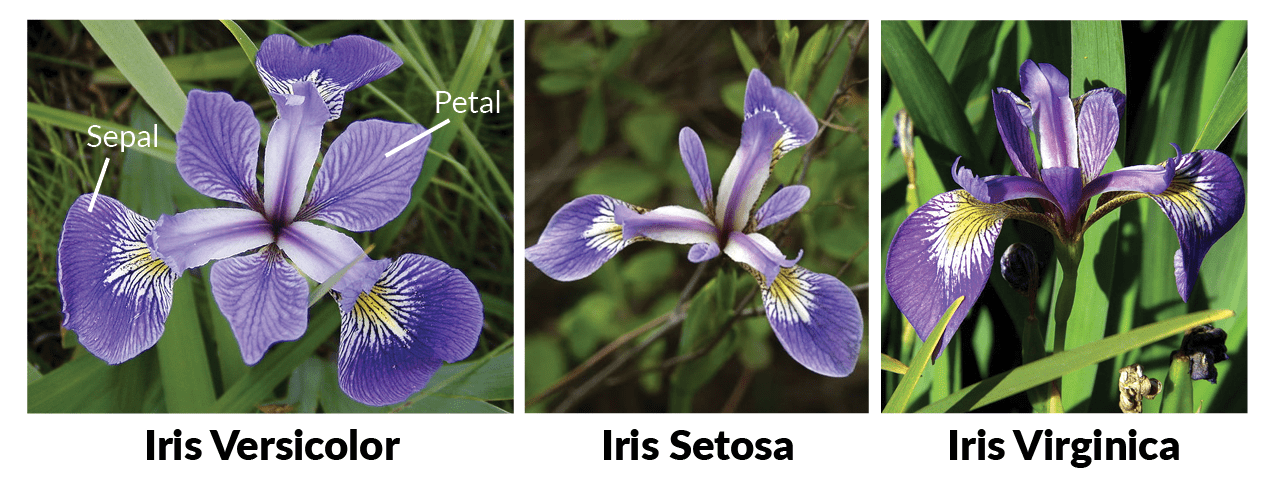

# 1 часть

Импорт необходимых библиотек

In [132]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection, linear_model, metrics, pipeline, preprocessing, ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка и визуализация данных в виде таблицы

Датасет можно получить с помощью команды `sklearn.datasets.load_iris()` или скачав с сайта Kaggle по [ссылке](https://www.kaggle.com/uciml/iris).

In [133]:
dataset = pandas.read_csv('Iris.csv')
dataset.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
139,140,6.9,3.1,5.4,2.1,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
116,117,6.5,3.0,5.5,1.8,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
31,32,5.4,3.4,1.5,0.4,Iris-setosa


## Гипотезы

1. __Данные о ширине и длине лепестков ириса сильно коррелируют.__

Логично предположить, что если лепесток большой в длину, то он наверняка крупный и в ширину. Корреляция признаков может негативно сказаться на обучении модели.

2. __Введение дополнительных параметров, таких как произведение длины и ширины лепестков, позитивно скажется на качестве модели__ 

Введение доп параметров позволит отследить не только линейные зависимости между переменными, и это, вероятно, может помочь лучше предсказывать к какому классу относится тот или иной ирис.

Для того, чтобы подтвердить или опровергнуть гипотезы, построим графики, которые показывают распределение признаков, а также то, как один признак зависит от другого. Затем выведем численную информацию о корреляции признаков.

При обучении модели уберем признаки, которые сильно коррелируют друг с другом, а также введем новые.

# 2 и 3 части

Отбрасываем столбец id за ненужностью. Id не является признаком, а значит не стоит оставлять его в датасете, чтобы не рассматривать зависимости, которые нас не интересуют.

In [134]:
dataset.drop("Id", axis=1, inplace=True)

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


По информации определимся, с какими признаками имеем дело: 
- Категориальные признаки: `['Species']`
- Числовые признаки: `['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']`

## Графики распределения признаков

### Распределение по классам

In [136]:
def bar_plot(variable):
    var = dataset[variable]
    varValue = var.value_counts()
    
    # визуализация
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [137]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['Species']


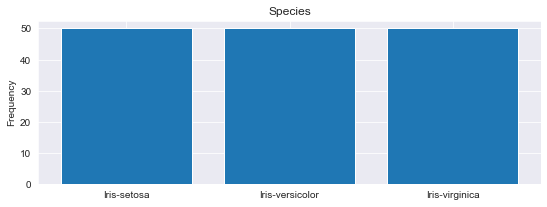

Species:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [138]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

Видно, что ирисы разных видов представлены в одинаковом количестве.

### Распределение численных признаков

In [139]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [140]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

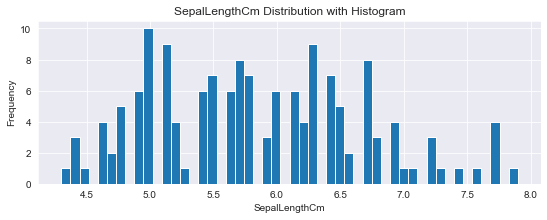

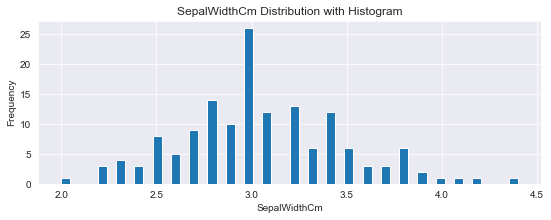

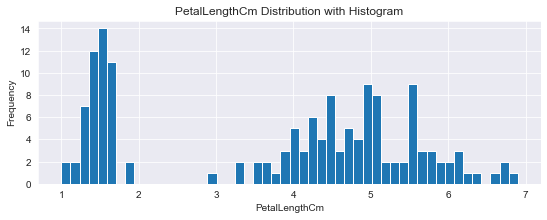

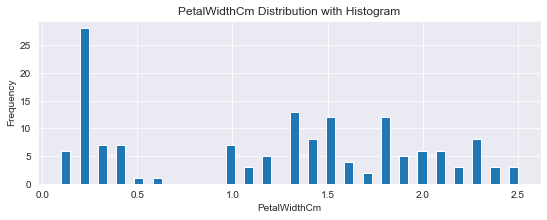

In [141]:
for n in numerical_float64_list:
    plot_hist(n)

Text(0.5, 1.0, 'PetalWidthCm Interval and Counts')

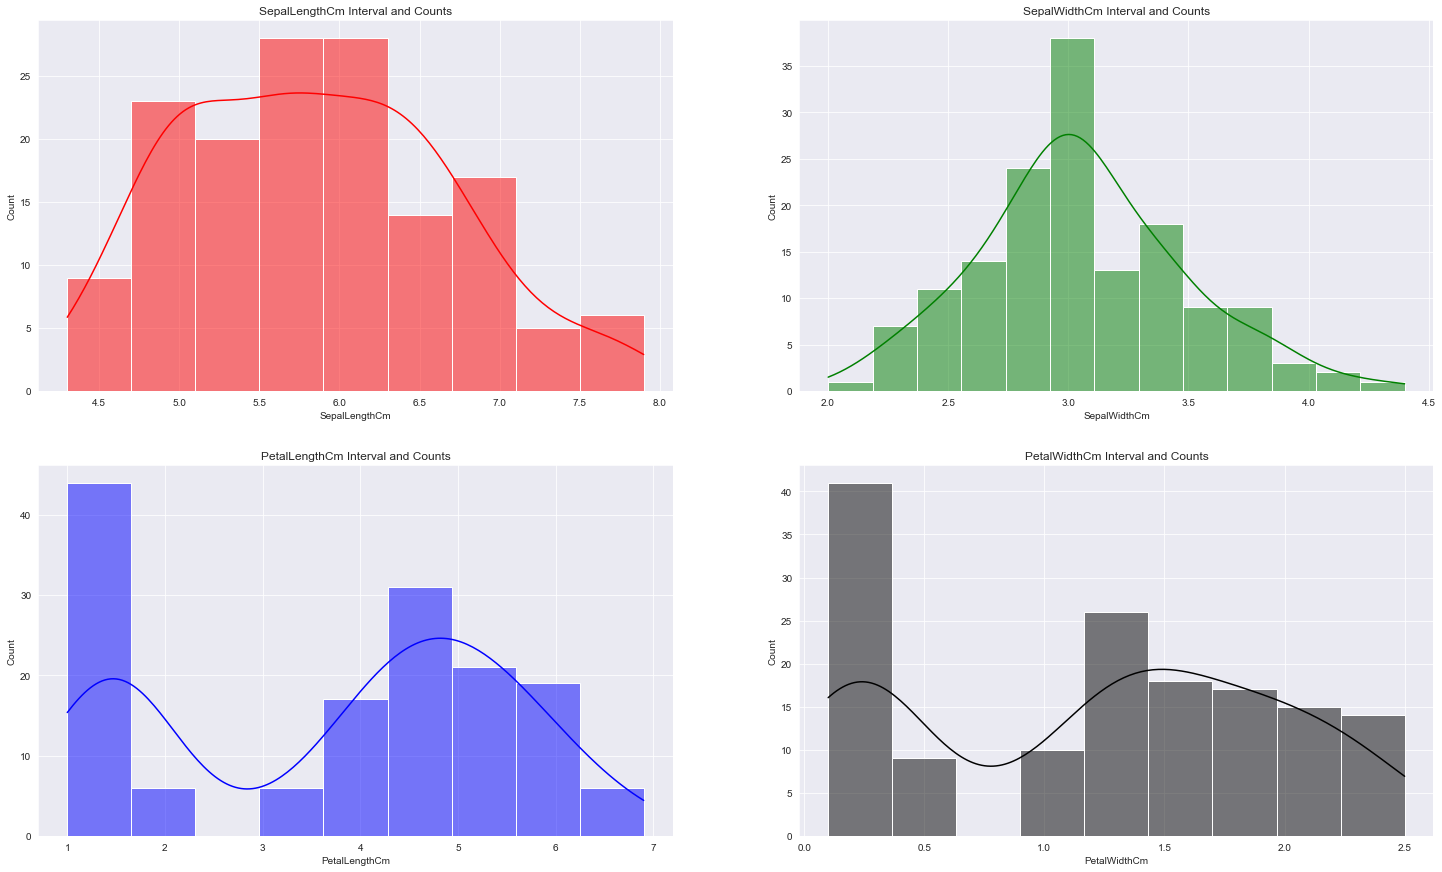

In [142]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(dataset['SepalLengthCm'], color = 'red', kde = True).set_title('SepalLengthCm Interval and Counts')

plt.subplot(2,2,2)
sns.histplot(dataset['SepalWidthCm'], color = 'green', kde = True).set_title('SepalWidthCm Interval and Counts')

plt.subplot(2,2,3)
sns.histplot(dataset['PetalLengthCm'], kde = True, color = 'blue').set_title('PetalLengthCm Interval and Counts')

plt.subplot(2,2,4)
sns.histplot(dataset['PetalWidthCm'], kde = True, color = 'black').set_title('PetalWidthCm Interval and Counts')

Отметим, что распределение признака SepalWidthCm близко к нормальному. Про остальные данные можно сказать лишь то, что в них нет явных выбросов.

### Корреляция признаков

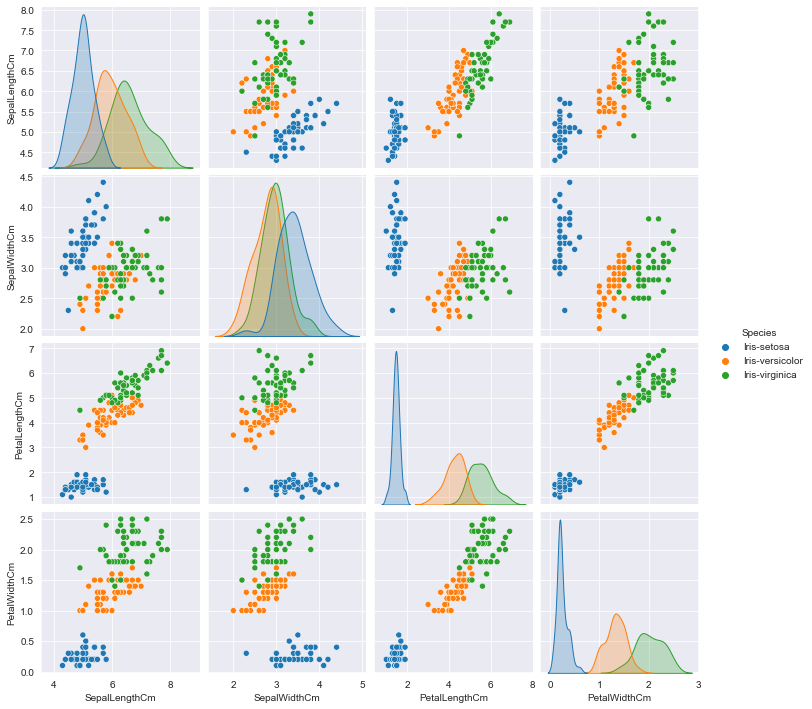

In [143]:
sns.pairplot(dataset, hue = 'Species')

In [144]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


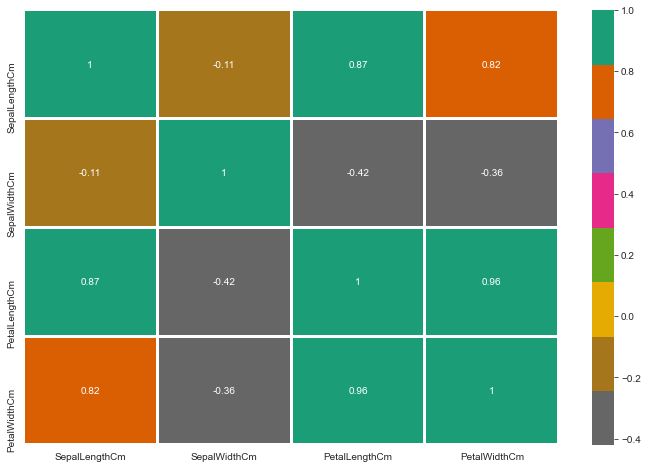

In [145]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

__Вывод__: наша первая гипотеза оказалась отчасти верна. PetalLengthCm и PetalWidthCm сильно скоррелированы между собой. Что нельзя сказать о длине и ширине лепестков Sepal. Вероятно стоит убрать один из скоррелированных признаков перед тем, как обучать по данным модель.

# Применение методов машинного обучения

В первом приближении можно просто включить все переменные в модель и посмотреть, что будет. Далее можно будет убрать лишние и включит новые для проверки второй гипотезы.

## Первое приближение

In [146]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(dataset.drop('Species', axis=1), 
                                                                                     dataset['Species'].values, 
                                                                                     test_size=0.2)

In [147]:
numeric_data_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

In [148]:
model = linear_model.RidgeClassifier(random_state=2)

Не забываем включить в пайплайн преобразование числовых признаков  с помощью StandardScaler.

In [149]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [  
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        ])),
    ('model_fitting', model)
    ]
)

In [150]:
estimator.fit(train_data, train_labels)

Pipeline(steps=[('feature_processing',
                 FeatureUnion(transformer_list=[('numeric_variables_processing',
                                                 Pipeline(steps=[('selecting',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fe21086cc10>)),
                                                                 ('scaling',
                                                                  StandardScaler(with_mean=0))]))])),
                ('model_fitting', RidgeClassifier(random_state=2))])

## Оценка по отложенному тесту №1

Проверим, насколько хорошо наша модель работает на тестовых данных. 

In [151]:
metrics.accuracy_score(test_labels, estimator.predict(test_data))

0.8

## Работа с признаками и обучение новой модели

In [152]:
dataset['PetalLengthCm x PetalWidthCm'] = dataset['PetalLengthCm'] * dataset['PetalWidthCm']
dataset['SepalLengthCm x SepalWidthCm'] = dataset['SepalLengthCm'] * dataset['SepalWidthCm']

In [153]:
dataset.drop('PetalLengthCm', axis=1, inplace=True)

In [154]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species,PetalLengthCm x PetalWidthCm,SepalLengthCm x SepalWidthCm
0,5.1,3.5,0.2,Iris-setosa,0.28,17.85
1,4.9,3.0,0.2,Iris-setosa,0.28,14.70
2,4.7,3.2,0.2,Iris-setosa,0.26,15.04
3,4.6,3.1,0.2,Iris-setosa,0.30,14.26
4,5.0,3.6,0.2,Iris-setosa,0.28,18.00


In [155]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(dataset.drop('Species', axis=1), 
                                                                                     dataset['Species'].values, 
                                                                                     test_size=0.2)

In [159]:
numeric_data_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm x PetalWidthCm', 'SepalLengthCm x SepalWidthCm']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

In [160]:
new_model = linear_model.RidgeClassifier(random_state=1)

In [161]:
estimator.model_fitting = new_model

In [162]:
estimator.fit(train_data, train_labels)

Pipeline(steps=[('feature_processing',
                 FeatureUnion(transformer_list=[('numeric_variables_processing',
                                                 Pipeline(steps=[('selecting',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fe21086cc10>)),
                                                                 ('scaling',
                                                                  StandardScaler(with_mean=0))]))])),
                ('model_fitting', RidgeClassifier(random_state=2))])

## Оценка по отложенному тесту №2

Проверим, насколько хорошо наша модель работает на тестовых данных. 

In [163]:
metrics.accuracy_score(test_labels, estimator.predict(test_data))

0.9

__Вывод__: Введение дополнительных признаков помогло улучшить модель, а значит вторая гипотеза оказалась верной.